<a href="https://colab.research.google.com/github/ANKITPODDER2000/nlp_colab/blob/master/NLPTensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [13]:
print("Versio of tensorflow : ",tf.__version__)

Versio of tensorflow :  2.2.0


In [0]:
import tensorflow_datasets as tfds

In [0]:
imdb , info = tfds.load(name="imdb_reviews",with_info=True,as_supervised=True)

In [0]:
train_sentence = []
train_label    = []
test_sentence  = []
test_label     = []

for s,l in imdb['train']:
  train_sentence.append(s.numpy())
  train_label.append(l.numpy())

for s,l in imdb['test']:
  test_sentence.append(s.numpy())
  test_label.append(l.numpy())

In [17]:
print("Length of Train Label : ",len(train_label))
print("Length of test Label : ",len(test_label))

Length of Train Label :  25000
Length of test Label :  25000


In [0]:
for i in range(len(train_sentence)):
    train_sentence[i] = str(train_sentence[i])[2:-1]

In [0]:
for i in range(len(test_sentence)):
    test_sentence[i] = str(test_sentence[i])[2:-1]

In [0]:
#train_sentence[0]

In [0]:
vocab_size = 10000
maxlen     = 120
dim        = 16
oov_token  = "<oov>"
padding    = "post"
truncating = 'post'

In [0]:
import numpy as np

In [0]:
y_train = np.array(train_label)
y_test  = np.array(test_label)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
#tokenizer 1

In [0]:
tokenizer1 = Tokenizer(num_words=vocab_size,oov_token=oov_token)

In [0]:
tokenizer1.fit_on_texts(train_sentence)
word_index1 = tokenizer1.word_index
train_sequence = tokenizer1.texts_to_sequences(train_sentence)
X_train = pad_sequences(train_sequence,maxlen=maxlen,truncating=truncating)

In [0]:
test_sequence = tokenizer1.texts_to_sequences(test_sentence)
X_test = pad_sequences(test_sequence,maxlen=maxlen,truncating=truncating)

In [57]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size,16,input_length=maxlen),
  tf.keras.layers.Dense(6,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model1.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model1.summary()

history = model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
dense_2 (Dense)              (None, 120, 6)            102       
_________________________________________________________________
dense_3 (Dense)              (None, 120, 1)            7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6848 - acc: 0.5455 - val_loss: 0.6824 - val_acc: 0.5477
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.6785 - acc: 0.5555 - val_loss: 0.6824 - val_acc: 0.5482
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.6775 - acc: 0.5566 - val_loss: 0.6827 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
dense (Dense)                (None, 120, 6)            102       
_________________________________________________________________
dense_1 (Dense)              (None, 120, 1)            7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [58]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size,16,input_length=maxlen),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model2.summary()

history2 = model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4835 - acc: 0.7512 - val_loss: 0.3781 - val_acc: 0.8290
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2446 - acc: 0.9037 - val_loss: 0.4052 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import seaborn as sns
sns.set_style("darkgrid")

In [0]:
def loss_acc(history):
  fig,ax = plt.subplots(1,2,figsize=(18,6))
  ax[0].plot(history.history['acc'],label="Training")
  ax[0].plot(history.history['val_acc'],label="Testing")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Acc")
  ax[0].set_title("Accurecy")

  ax[1].plot(history.history['loss'],label="Training")
  ax[1].plot(history.history['val_loss'],label="Testing")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")
  ax[1].set_title("Loss")

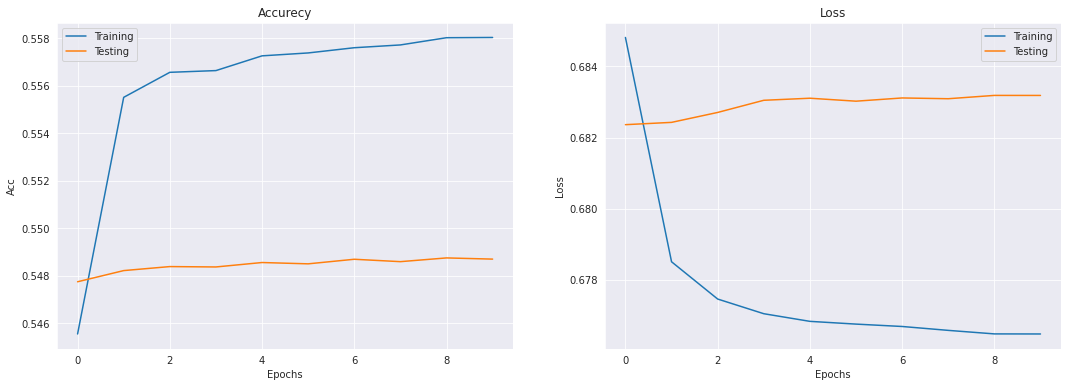

In [74]:
loss_acc(history)

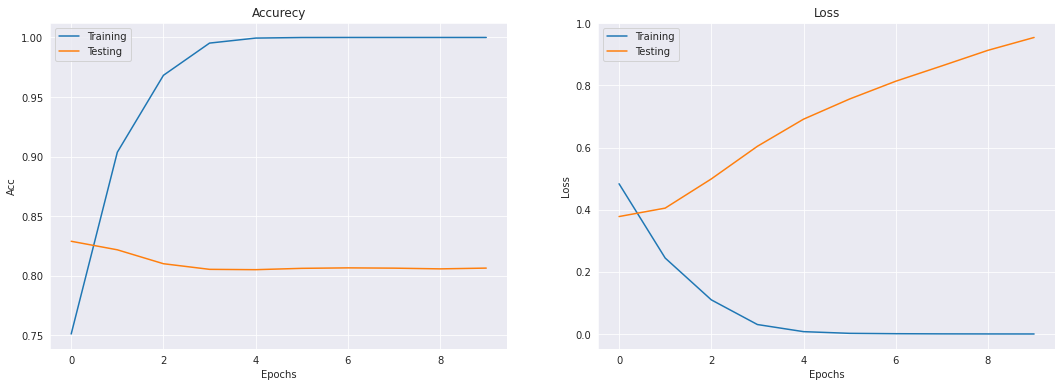

In [75]:
loss_acc(history2)

In [76]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size,32,input_length=maxlen),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model3.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model3.summary()

history3 = model3.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                122912    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 442,945
Trainable params: 442,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4692 - acc: 0.7610 - val_loss: 0.3887 - val_acc: 0.8242
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1621 - acc: 0.9420 - val_loss: 0.5330 

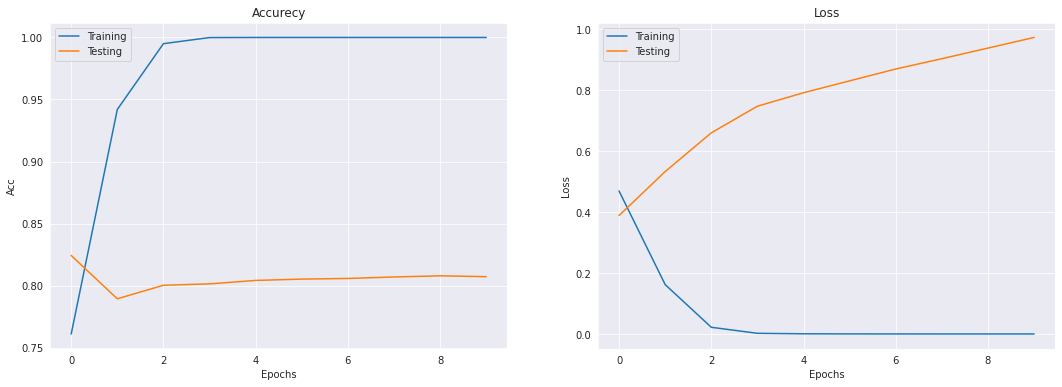

In [77]:
loss_acc(history3)

In [91]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size,16,input_length=maxlen),

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(6,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model4.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model4.summary()

history4 = model4.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 16s 20ms/step - loss: 0.4787 - acc: 0.7672 - val_loss: 0.3921 - val_acc: 0.8215
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3009 - acc: 0.8790 - val_loss: 0.

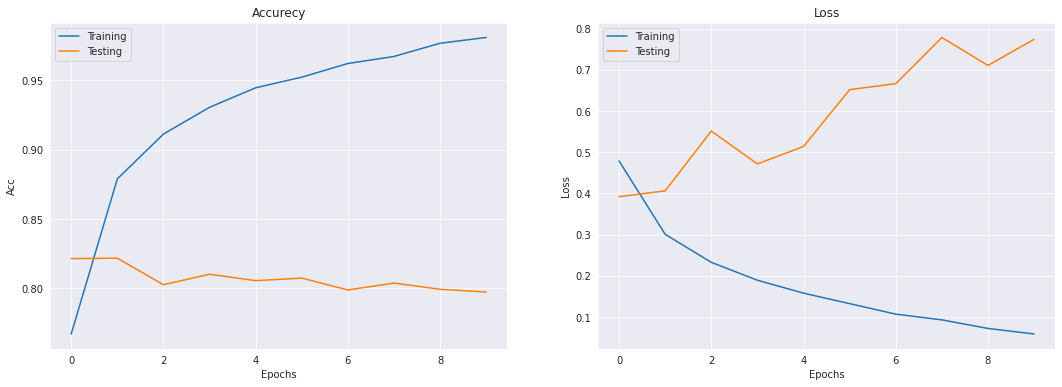

In [92]:
loss_acc(history4)

In [94]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size,16,input_length=maxlen),

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(6,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model5.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model5.summary()

history5 = model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 7         
Total params: 243,085
Trainable params: 243,085
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 26s 33ms/step - loss: 0.6932 - acc: 0.4944 - val_loss: 0.69

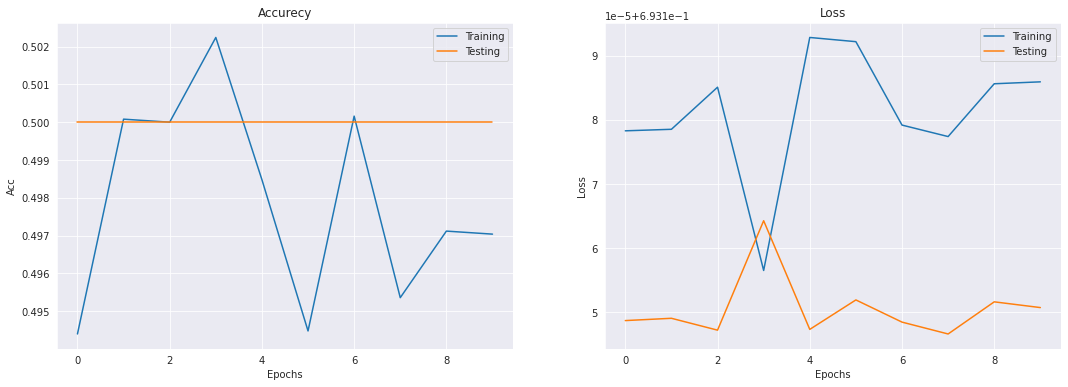

In [95]:
loss_acc(history5)

In [96]:
model6 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size,16,input_length=maxlen),

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dense(6,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model6.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model6.summary()

history6 = model6.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120, 128)          41472     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 7         
Total params: 284,301
Trainable params: 284,301
Non-trainable params: 0
_______________________________________________

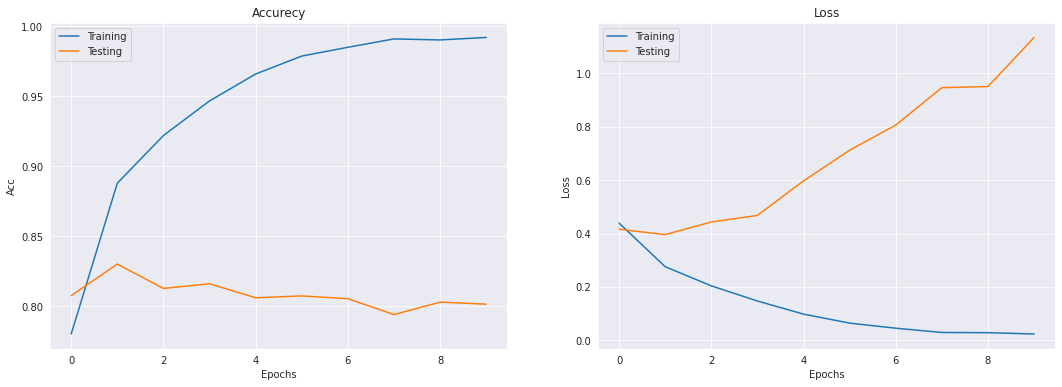

In [98]:
loss_acc(history6)